In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load dfset
path = '/content/laporan_iklim_harian.xlsx'  # Sesuaikan dengan path file Anda
load_data = pd.read_excel(path)

In [ ]:
df = load_data.copy()
df

,TANGGAL,RR
0,01-01-2020,19.9
1,02-01-2020,14.8
2,03-01-2020,2.1
3,04-01-2020,2.5
4,05-01-2020,6.5
...,...,...
1808,27-12-2024,0.5
1809,28-12-2024,8888
1810,2024-12-29 00:00:00,8888
1811,2024-12-30 00:00:00,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  1813 non-null   object
 1   RR       1813 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [ ]:
# Ganti type data kolom RR jadi number dan tanggal jadi datetime
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], format='%d-%m-%Y') # Specify the correct format here
df['RR'] = pd.to_numeric(df['RR'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813 entries, 0 to 1812
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  1813 non-null   datetime64[ns]
 1   RR       1501 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.5 KB


In [ ]:
# Cek missing value
df.isna().sum()

,0
TANGGAL,0
RR,312


In [ ]:
# # Isi missing value pake interpolate
df['RR'] = df['RR'].interpolate()

In [ ]:
# Cek missing value
df.isna().sum()

,0
TANGGAL,0
RR,0


In [ ]:
df['RR'].value_counts()

,count
RR,
0.000,442
8888.000,100
0.200,34
0.500,27
1.500,27
...,...
0.875,1
3.950,1
4447.150,1


In [ ]:
# Replace specific values with NaN for interpolation
df['RR'] = df['RR'].replace([x for x in df['RR'] if x > 1000], np.nan)

# Cek missing value
print(df.isna().sum())

# Isi missing value pake interpolate
df['RR'] = df['RR'].interpolate()

# Cek missing value
print(df.isna().sum())

TANGGAL      0
RR         146
dtype: int64
TANGGAL    0
RR         0
dtype: int64


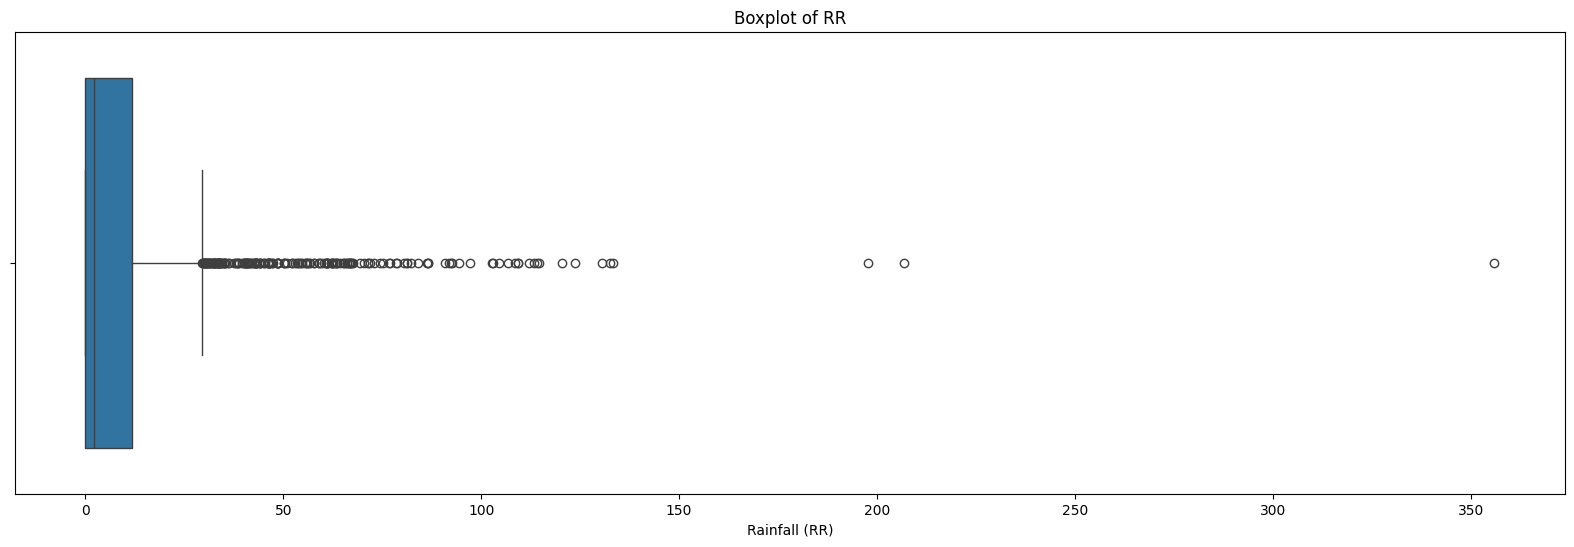

In [ ]:
# Cek outlier

import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='RR', data=df)
plt.title('Boxplot of RR')
plt.xlabel('Rainfall (RR)')
plt.show()

In [ ]:
# prompt: pakein log transformasi ajadah

# Log Transformasi
df['RR_log'] = np.log1p(df['RR'])
df

,TANGGAL,RR,RR_log
0,2020-01-01,19.9,3.039749
1,2020-01-02,14.8,2.760010
2,2020-01-03,2.1,1.131402
3,2020-01-04,2.5,1.252763
4,2020-01-05,6.5,2.014903
...,...,...,...
1808,2024-12-27,0.5,0.405465
1809,2024-12-28,9.0,2.302585
1810,2024-12-29,17.5,2.917771
1811,2024-12-30,26.0,3.295837


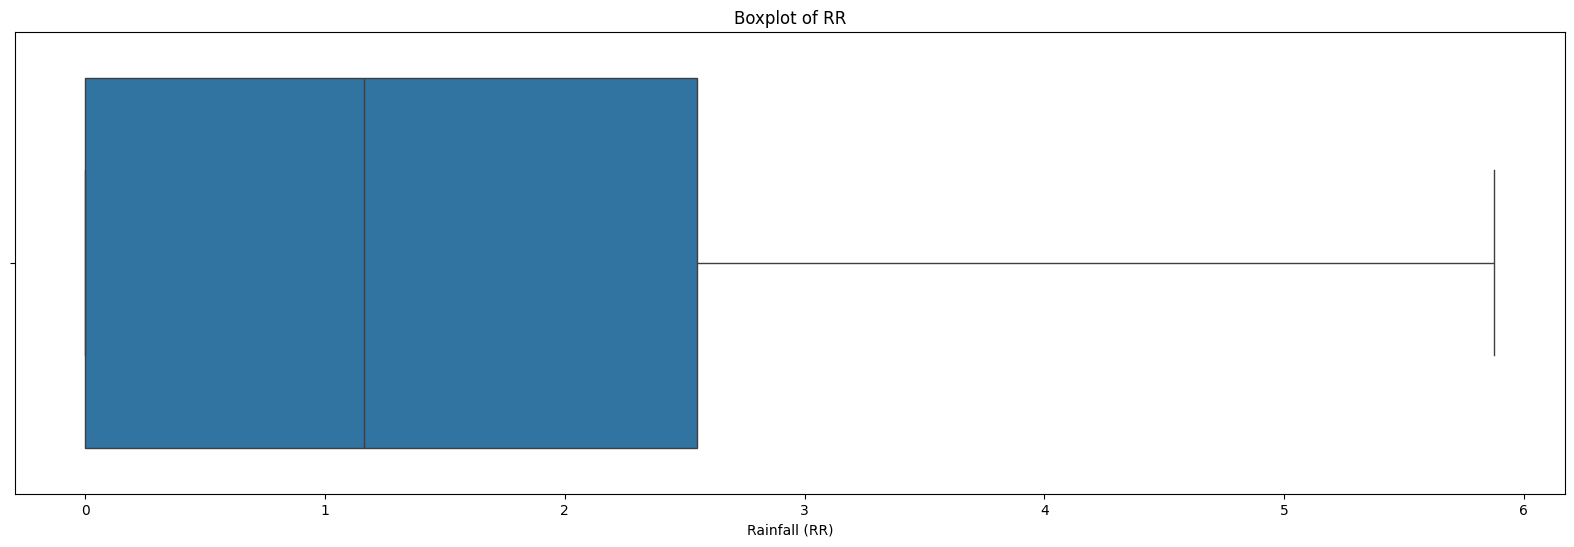

In [ ]:
# Cek outlier

import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='RR_log', data=df)
plt.title('Boxplot of RR')
plt.xlabel('Rainfall (RR)')
plt.show()

In [ ]:
# # Replace specific values with NaN for interpolation
# df['RR'] = df['RR'].replace([x for x in df['RR'] if x > 250], np.nan)

# # Cek missing value
# print(df.isna().sum())

# # Isi missing value pake interpolate
# df['RR'] = df['RR'].interpolate()

# # Cek missing value
# print(df.isna().sum())

In [ ]:
# nilai_diatas_1000 = [x for x in df['RR'] if x > 250]

# print(f"Nilai di atas 1000: {nilai_diatas_1000}")

In [ ]:
# prompt: cek nilai maksimal variabel rr

#print(df['RR'].max())

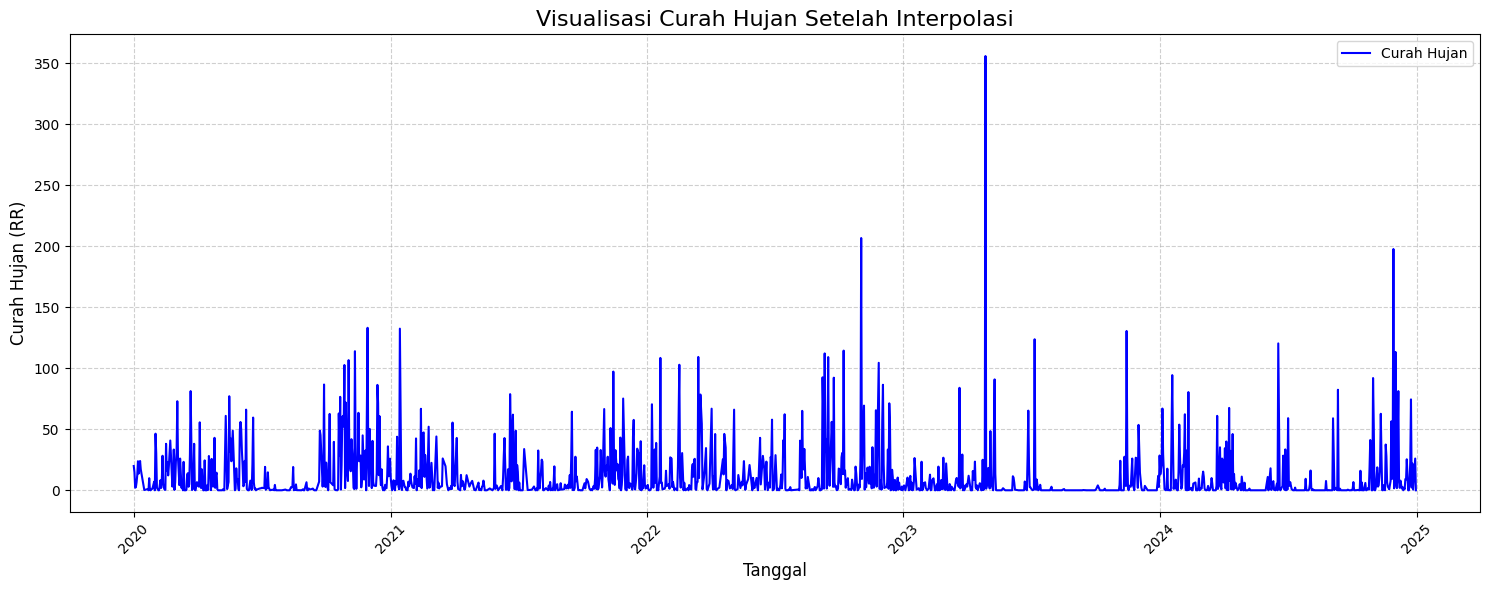

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(df['TANGGAL'], df['RR'], color='blue', label='Curah Hujan', linestyle='-')
plt.title('Visualisasi Curah Hujan Setelah Interpolasi', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Curah Hujan (RR)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

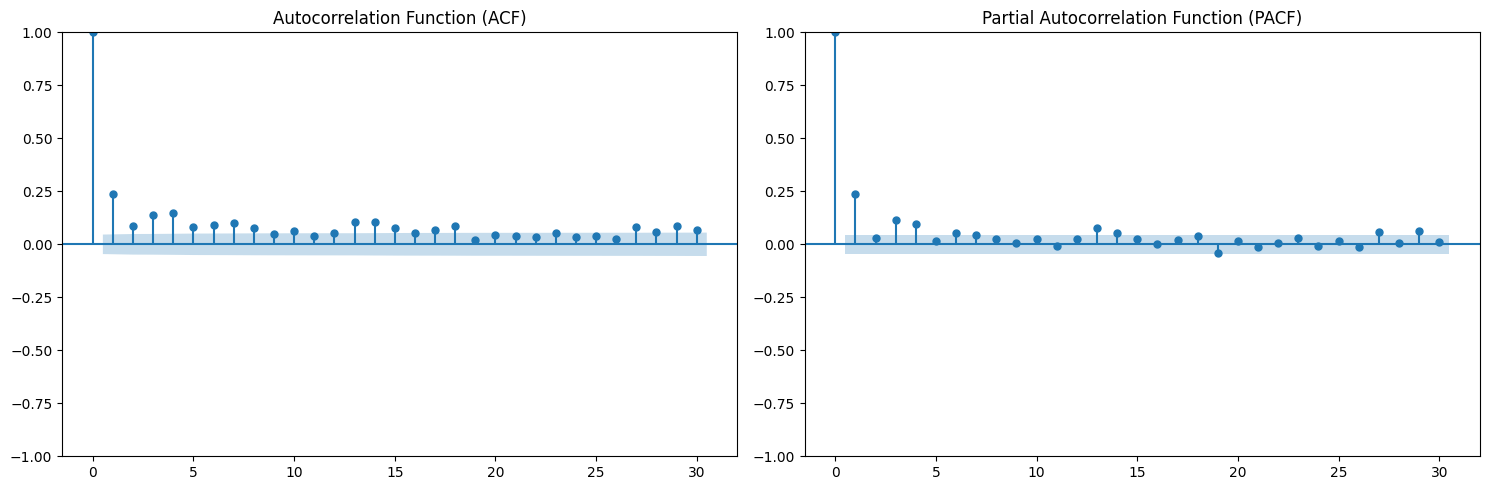

In [ ]:
# prompt: cek acf dan pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

plot_acf(df['RR'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df['RR'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(df['RR'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.984074921305225
p-value: 2.5769096310944732e-12


H0 ditolak = Data Stationare

<Figure size 1200x800 with 0 Axes>

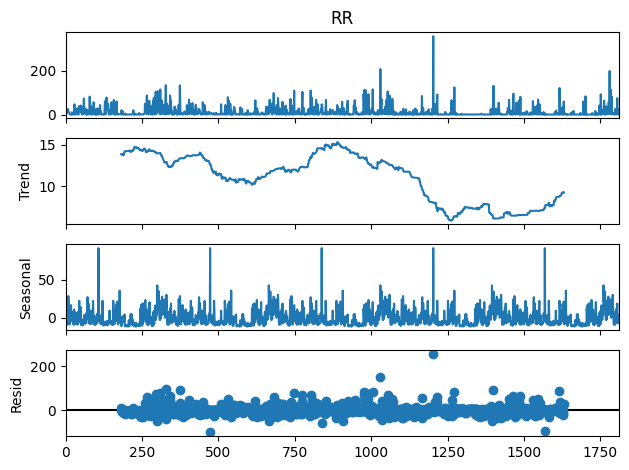

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Seosanal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['RR'], model='additive', period=365) #period=365 because it's yearly data

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.6 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
data = df['RR_log']
# Membagi data menjadi data latih dan data uji
train, test = data[:int(0.8*len(data))], data[int(0.8*len(data)):]


karena data direkam per hari, maka parameter m(musiman) itu nilainya 7

In [ ]:
from pmdarima import auto_arima

# Cari parameter SARIMA optimal
auto_model = auto_arima(train, seasonal=True, m=7, trace=True, suppress_warnings=True)
print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=4514.442, Time=31.99 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4962.491, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4830.917, Time=1.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4638.927, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4960.491, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=4512.667, Time=11.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=4510.757, Time=1.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=4512.658, Time=7.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=4510.959, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=4511.014, Time=1.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[7] intercept   : AIC=4510.961, Time=2.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[7] intercept   : AIC=4509.216, Time=2.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,0)[7] intercept   : AIC=4511.086, Time=12.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,1)[7] intercept   : AIC=4511.096, Time=6.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,1)[7] intercept   : AIC=4513.051, Time=10.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[7] intercept   : AIC=4510.762, Time=1.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[7] intercept   : AIC=4510.422, Time=7.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[7] intercept   : AIC=4504.808, Time=4.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(1,0,0)[7] intercept   : AIC=4507.106, Time=10.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,1)[7] intercept   : AIC=4511.712, Time=16.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(1,0,1)[7] intercept   : AIC=4513.537, Time=22.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[7] intercept   : AIC=4510.708, Time=3.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[7] intercept   : AIC=4504.471, Time=5.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,0)[7] intercept   : AIC=4502.920, Time=11.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,0)[7] intercept   : AIC=4507.035, Time=14.80 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,1)[7] intercept   : AIC=4504.026, Time=11.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,1)[7] intercept   : AIC=4503.167, Time=12.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,1)[7] intercept   : AIC=4508.150, Time=19.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(1,0,0)[7] intercept   : AIC=4509.234, Time=10.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(1,0,0)[7] intercept   : AIC=4503.698, Time=9.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(1,0,0)[7] intercept   : AIC=4505.698, Time=11.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(1,0,0)[7] intercept   : AIC=4505.679, Time=9.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(1,0,0)[7] intercept   : AIC=4503.032, Time=10.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(1,0,0)[7] intercept   : AIC=inf, Time=8.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,0)[7]             : AIC=4500.898, Time=6.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[7]             : AIC=4502.224, Time=2.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,0)[7]             : AIC=4500.840, Time=7.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(2,0,1)[7]             : AIC=4503.370, Time=7.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(1,0,1)[7]             : AIC=4501.532, Time=6.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(2,0,0)[7]             : AIC=4517.097, Time=5.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,0)[7]             : AIC=4507.792, Time=5.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(2,0,0)[7]             : AIC=4503.071, Time=11.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,5)(2,0,0)[7]             : AIC=4503.381, Time=13.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,0)[7]             : AIC=4509.574, Time=2.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,5)(2,0,0)[7]             : AIC=4505.373, Time=9.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(2,0,0)[7]             : AIC=4501.760, Time=8.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(2,0,0)[7]             : AIC=inf, Time=17.98 sec

Best model:  ARIMA(3,1,4)(2,0,0)[7]          
Total fit time: 400.951 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1450
Model:             SARIMAX(3, 1, 4)x(2, 0, [], 7)   Log Likelihood               -2240.420
Date:                            Wed, 29 Jan 2025   AIC                           4500.840
Time:                                    17:10:47   BIC                           4553.626
Sample:                                         0   HQIC                          4520.539
                                           - 1450                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [ ]:
# Membangun model SARIMAX
model = SARIMAX(train, order=(3,1,4 ), seasonal_order=(2,0,0,7))  # Only use the 'RR' column, which is numeric
sarima_model = model.fit(disp=False)

# Prediksi musiman
predictions_seasonal = sarima_model.predict(start=test.index[0], end=test.index[-1], dynamic=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Get the AIC value
aic = sarima_model.aic
print(f'Akaike Information Criterion (AIC): {aic}')

Akaike Information Criterion (AIC): 4500.839875157079


In [ ]:
import xgboost as xgb

# Hitung residual
residual = test - predictions_seasonal

# Tambahkan fitur tambahan
residual_indices = pd.date_range(start=test.index[0], end=test.index[-1], freq='D')
X_train = pd.DataFrame({
    'day_of_year': residual_indices.dayofyear,
    'month': residual_indices.month,
    'day_of_week': residual_indices.dayofweek
})

# Siapkan data untuk XGBoost (gunakan fitur lain jika ada)
X_train = np.array(range(len(residual)))
X_test = np.array(range(len(test)))

# Reshape ke format yang sesuai
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


# Membuat model XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, residual)

# Prediksi residual
residual_predictions = xgb_model.predict(X_test)

In [ ]:
# Gabungkan prediksi musiman dan residual
final_predictions = predictions_seasonal + residual_predictions

In [ ]:
# Assuming 'RR' is the column you want to compare with
mae = np.mean(np.abs(test - final_predictions))
print(f'MAE: {mae}')

# Similarly for other metrics:
from sklearn.metrics import r2_score
r2 = r2_score(test, final_predictions)
print(f'R²: {r2}')

mse = np.mean((test- final_predictions) ** 2)
print(f'MSE: {mse}')

MAE: 0.35999524248048764
R²: 0.7933779643605063
MSE: 0.39040998728459214


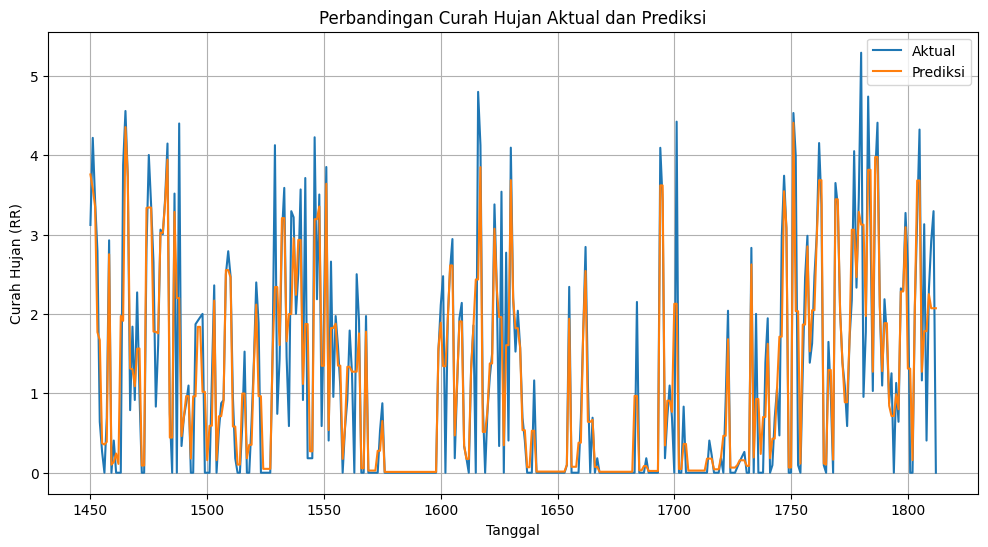

In [ ]:
# visualisasi
import matplotlib.pyplot as plt

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Aktual')
plt.plot(test.index, final_predictions, label='Prediksi') # Use test.index for x-axis for both plots
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (RR)')
plt.title('Perbandingan Curah Hujan Aktual dan Prediksi')
plt.legend()
plt.grid(True)
plt.show()

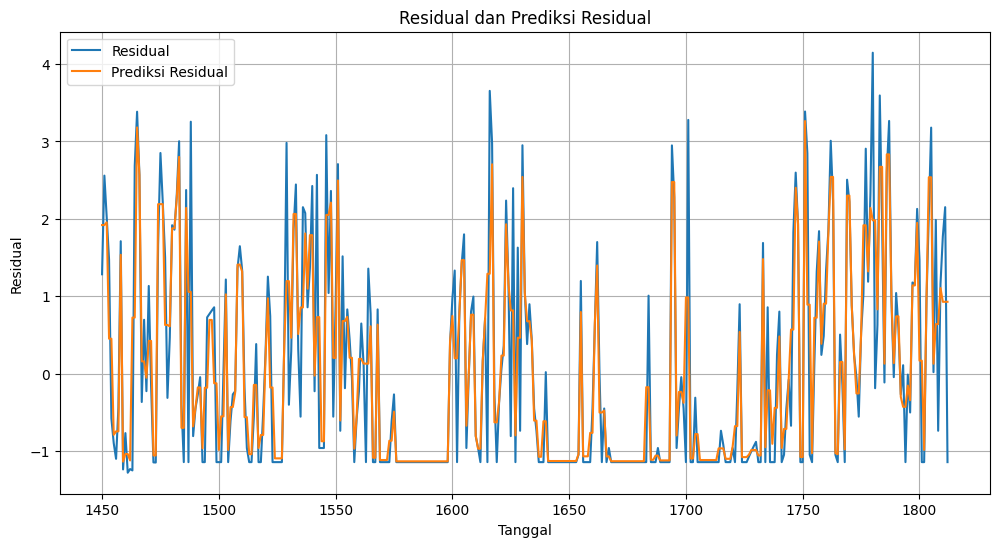

In [ ]:
# Visualisasi Residual
plt.figure(figsize=(12, 6))

# Ensure residual and test.index have the same length
residual = residual.reindex(test.index) # Reindex residual to match test.index

# Ensure residual_predictions and test.index have the same length
# Instead of slicing, reindex residual_predictions to match test.index
residual_predictions = pd.Series(residual_predictions, index=test.index[:len(residual_predictions)]).reindex(test.index)

plt.plot(test.index, residual, label='Residual')
plt.plot(test.index, residual_predictions, label='Prediksi Residual')
plt.xlabel('Tanggal')
plt.ylabel('Residual')
plt.title('Residual dan Prediksi Residual')
plt.legend()
plt.grid(True)
plt.show()